In [1]:
cd /content/drive/My Drive/Colab Notebooks/Protonx/5/data

[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/Protonx/5/data'
/content


In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O ./cats_and_dogs_filtered.zip

--2020-05-08 13:21:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./cats_and_dogs_filtered.zip’

./cats_and_dogs_fil 100%[===================>]  65.43M  72.1MB/s    in 0.9s    

2020-05-08 13:21:33 (72.1 MB/s) - ‘./cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
main_folder = './'
!unzip -q cats_and_dogs_filtered.zip -d $main_folder

In [4]:
cd cats_and_dogs_filtered

/content/cats_and_dogs_filtered


In [0]:
train_data = './train'
valid_data = './validation'

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [7]:
from google.colab import files
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
gen_train = ImageDataGenerator(rescale=1/255)
gen_valid = ImageDataGenerator(rescale=1/255)

In [0]:
model = Sequential()

In [10]:
model.add(Conv2D(16, (3,3), activation="relu", input_shape = (200, 200, 3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [16]:
gen_training_data = gen_train.flow_from_directory(
    train_data,
    target_size = (200, 200),
    batch_size = 130,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.


In [17]:
gen_validation_data = gen_valid.flow_from_directory(
    valid_data,
    target_size = (200,200),
    batch_size = 130,
    class_mode = "binary"
)

Found 1000 images belonging to 2 classes.


In [0]:
import tensorflow as tf

DESIRED_ACCURACY = 0.7

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>DESIRED_ACCURACY):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
model.compile(loss = "binary_crossentropy", optimizer=RMSprop(learning_rate=0.001), metrics=["acc"])

In [21]:
history = model.fit_generator(
    gen_training_data,
    steps_per_epoch = 30,
    epochs = 20,
    verbose = 1,
    validation_data = gen_validation_data,
    validation_steps = 30,
    callbacks=[callbacks],
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
30/30 [==============================] - 181s 6s/step - loss: 1.2068 - acc: 0.5147 - val_loss: 0.6753 - val_acc: 0.5159
Epoch 2/20
30/30 [==============================] - 175s 6s/step - loss: 0.6701 - acc: 0.6136 - val_loss: 0.6288 - val_acc: 0.6874
Epoch 3/20
30/30 [==============================] - 174s 6s/step - loss: 0.6330 - acc: 0.6551 - val_loss: 0.6329 - val_acc: 0.5816
Epoch 4/20
30/30 [==============================] - 177s 6s/step - loss: 0.5968 - acc: 0.6968 - val_loss: 0.6010 - val_acc: 0.6920
Epoch 5/20
30/30 [==============================] - 174s 6s/step - loss: 0.5027 - acc: 0.7578 - val_loss: 0.6129 - val_acc: 0.6861
Epoch 6/20
30/30 [==============================] - ETA: 0s - loss: 0.4664 - acc: 0.7786
Reached 70% accuracy so cancelling training!
30/30 [==============================] - 174s 6s/step - loss: 0.4664 - acc: 0.7786 - val_loss: 0.6233 - val_acc: 0.7008


Saving tong_hop_meme_doan_xem_day_du_3_EZUQ.jpg to tong_hop_meme_doan_xem_day_du_3_EZUQ (2).jpg
Classes's values =  [[0.32882953]]


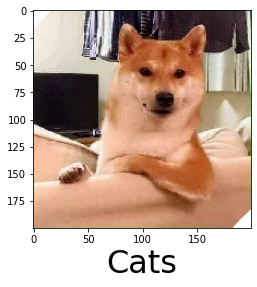

In [24]:
import numpy as np
import matplotlib.pyplot as plt
uploaded = files.upload()

for k in uploaded.keys():
    path = "./" + k
    img = image.load_img(path, target_size = (200,200))
    x = image.img_to_array(img) / 255
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)

    print("Classes's values = ", classes)

    if (classes[0] > 0.5):
        plt.imshow(img)
        plt.xlabel("Dogs", size = 32)
    else:
        plt.imshow(img)
        plt.xlabel("Cats", size = 32)

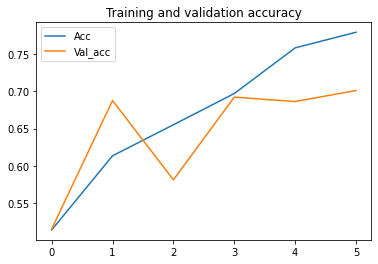

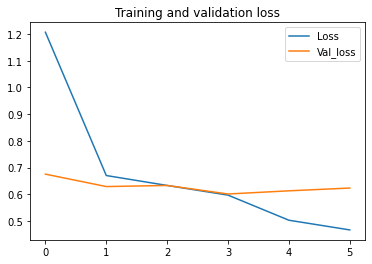

In [31]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc ,label = "Acc")
plt.plot  ( epochs, val_acc, label = "Val_acc")
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label = "Loss")
plt.plot  ( epochs, val_loss, label = "Val_loss")
plt.title ('Training and validation loss'   )
plt.legend()